In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GITHUB/pytorch_basic/pytorch
from mult_class_functions_1 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GITHUB/pytorch_basic/pytorch


In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [3]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
model_type = "CNN_deep"
new_model_Train = True
save_model_path = f"/content/drive/MyDrive/Colab notebooks/data/results/{model_type}_CIFAR10.pt"

In [4]:
transform = transforms.ToTensor()
train_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab notebooks/data', train = True, download = True, transform = transform)
test_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab notebooks/data', train = False, download = True, transform = transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
(10000, 32, 32, 3)
6


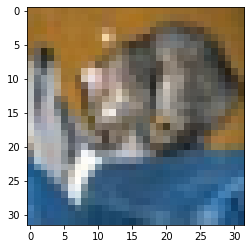

In [5]:
print(test_DS.classes)
print(test_DS.class_to_idx)
print(test_DS.data.shape)
plt.imshow(test_DS.data[0])
print(train_DS.targets[0])

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3,8,3,stride=2)
        self.bn1 = nn.BatchNorm2d(8)
        self.act1 = nn.ReLU()
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(8,16,3,padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.act2 = nn.ReLU()
        self.Maxpool2 = nn.MaxPool2d(2)
        self.fc = nn.Linear(16*3*3,10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.Maxpool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.Maxpool2(x)

        x = torch.flatten(x,start_dim=1)
        x = self.fc(x)
        return x

class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3, padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU(),
                                         nn.Conv2d(32,32,3, padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)
        
        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3, padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3, padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3, padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3, padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3, padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3, padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)

        self.fc = nn.Sequential(nn.Linear(128*4*4,512),
                                nn.Linear(512,10))

    def forward(self,x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x,start_dim=1)
        x = self.fc(x)
        return x

In [7]:
exec(f"model = {model_type}().to(DEVICE)")

Epoch: 1, train loss: 1.466
--------------------
Epoch: 2, train loss: 0.923
--------------------
Epoch: 3, train loss: 0.723
--------------------
Epoch: 4, train loss: 0.61
--------------------
Epoch: 5, train loss: 0.512
--------------------


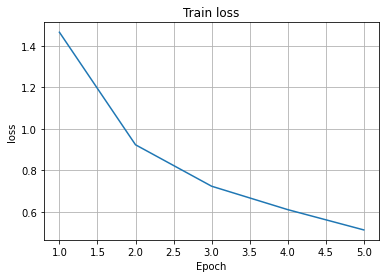

In [8]:
if new_model_Train:
    loss_history = Train(model, train_DL, LR = LR, EPOCH = EPOCH)
    torch.save(model, save_model_path)
    plt.plot(range(1, EPOCH+1), loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.title("Train loss")
    plt.grid()

In [9]:
load_model = torch.load(save_model_path, map_location=DEVICE) # map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음

Test accuracy: 7932/10000 (79.3 %)
1527018


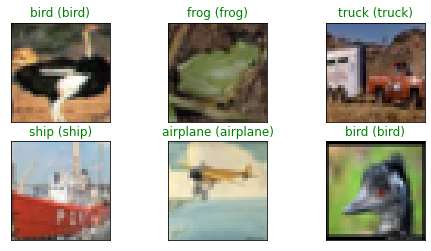

In [10]:
Test(load_model,test_DL)
count_params(load_model)
Test_plot(load_model, test_DL)